<a href="https://colab.research.google.com/github/vinayakghatul/Yulu-Hypothesis-Testing/blob/main/Yulu_Hypothesis_Testing_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files


In [2]:
uploaded = files.upload()

Saving bike_sharing.csv to bike_sharing.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded["bike_sharing.csv"]))

In [4]:
#Imported dataset for yulu bike sharing platform
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#Shape of data
df.shape

(10886, 12)

In [6]:
#Basic info & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# null values check
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
# duplicate rows check
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ",duplicate_rows.shape[0])

Number of duplicate rows:  0


In [9]:
# Unique values - column wise
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-11-42099470d587>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'),annot=True,cmap='viridis')


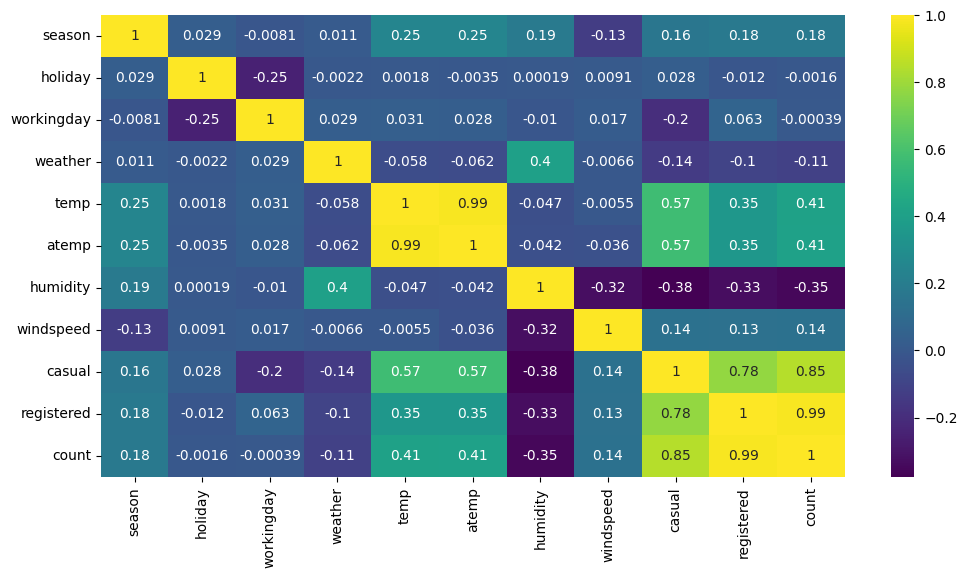

In [11]:
#plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

In [12]:
# understanding distribution of numerical variables

#following are numerical columns

num_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']

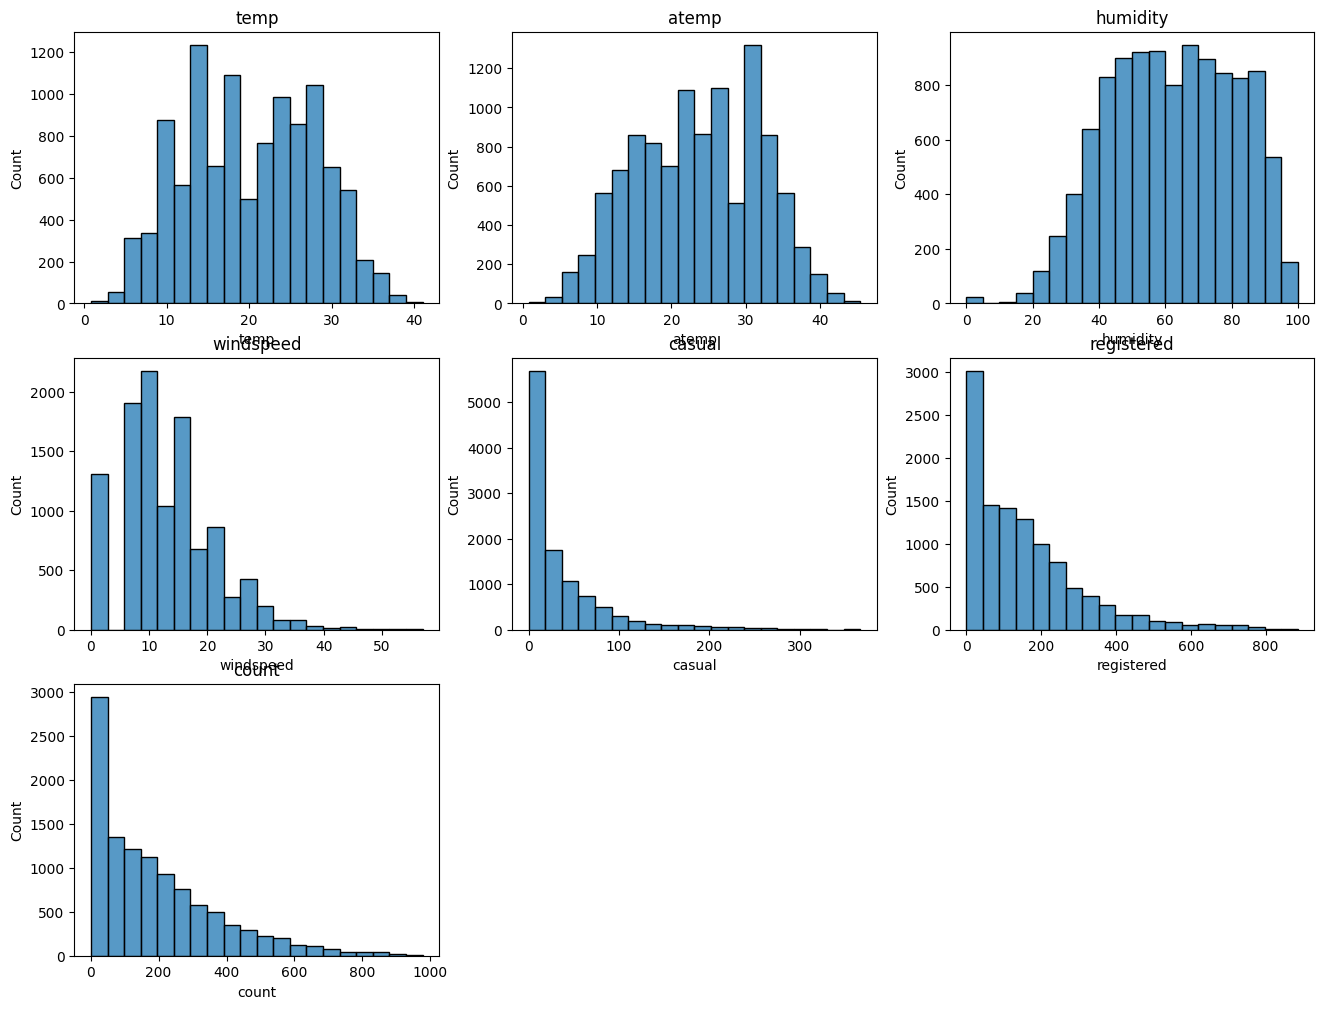

In [13]:
plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols):
  plt.subplot(3,3,i+1)
  sns.histplot(df[col], bins=20)
  plt.title(col)
plt.show()

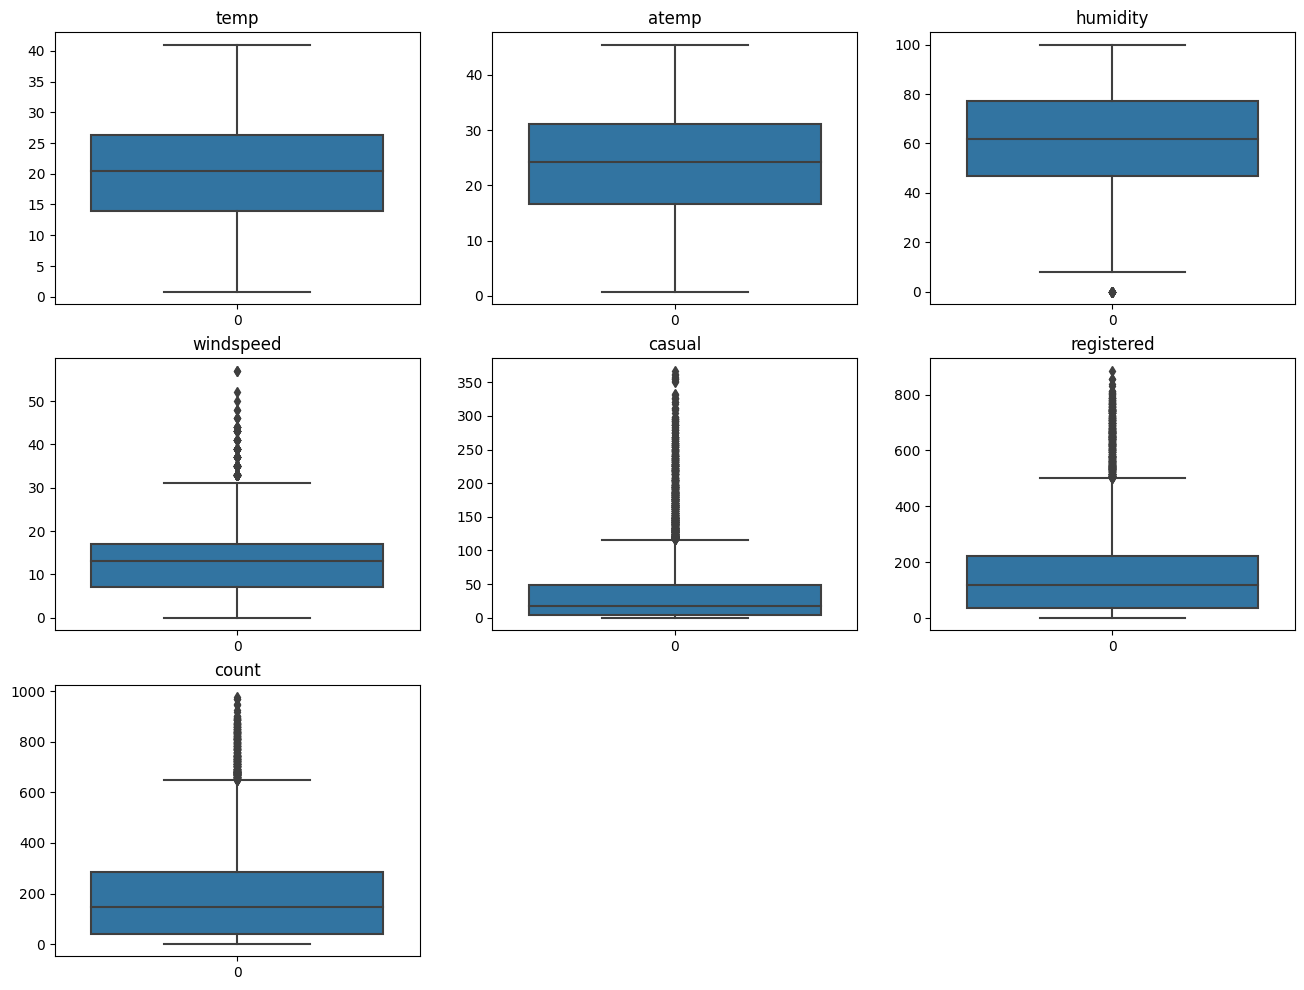

In [15]:
# boxplot subplots for num_cols

plt.figure(figsize=(16,12))
for i, col in enumerate(num_cols):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.show()

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
#categorical cols

cat_cols = ['season','holiday','workingday','weather']

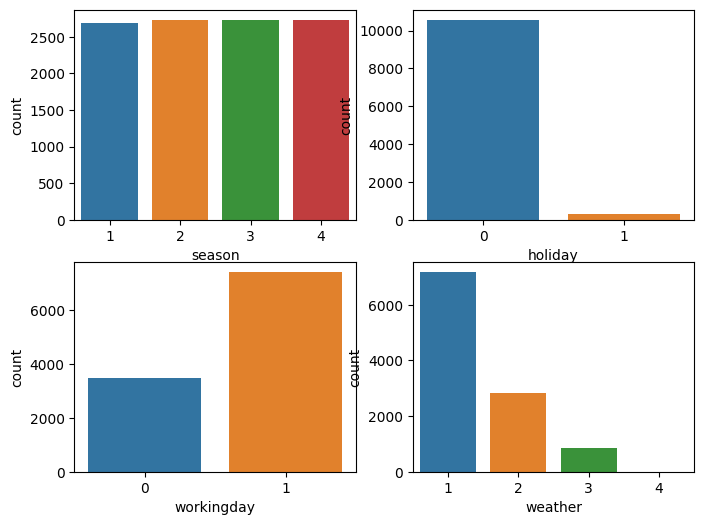

In [19]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()


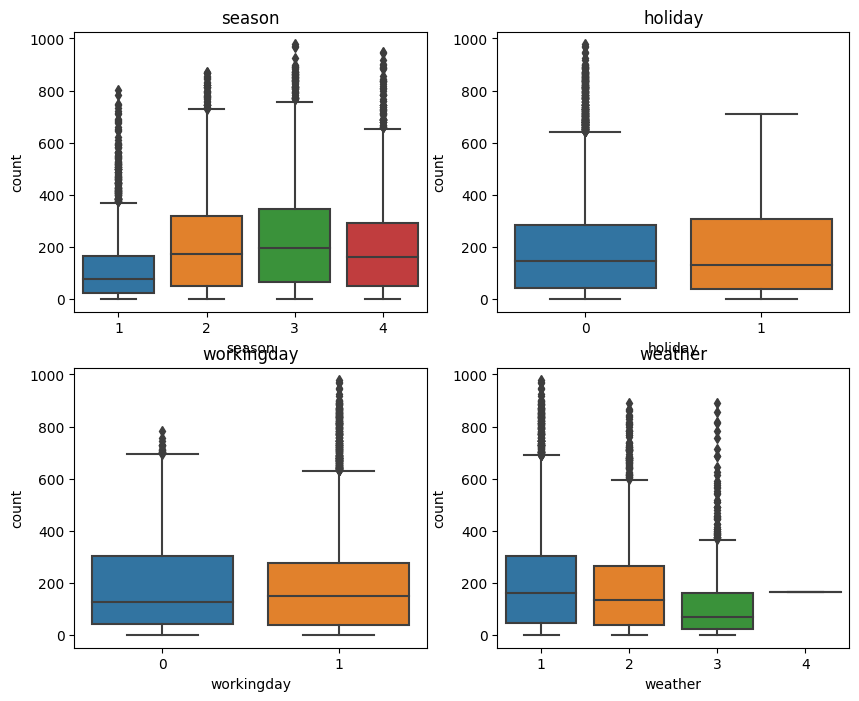

In [24]:
# boxplot subplots for categorical variables using cat_cols

plt.figure(figsize=(10,8))
for i, col in enumerate(cat_cols):
  plt.subplot(2,2,i+1)
  sns.boxplot(x=col, y='count', data=df)
  plt.title(col)
plt.show()


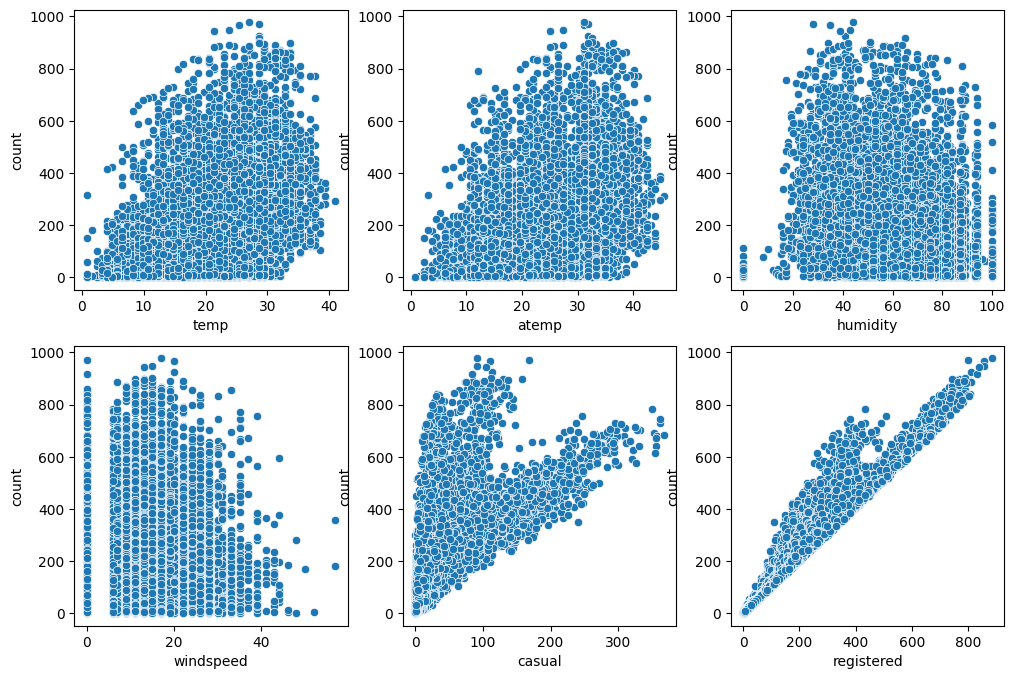

In [30]:

# scatterplot subplots for numerical variables exclude count column

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols[:-1]):
  plt.subplot(2,3,i+1)
  sns.scatterplot(x=col, y='count', data=df)

plt.show()


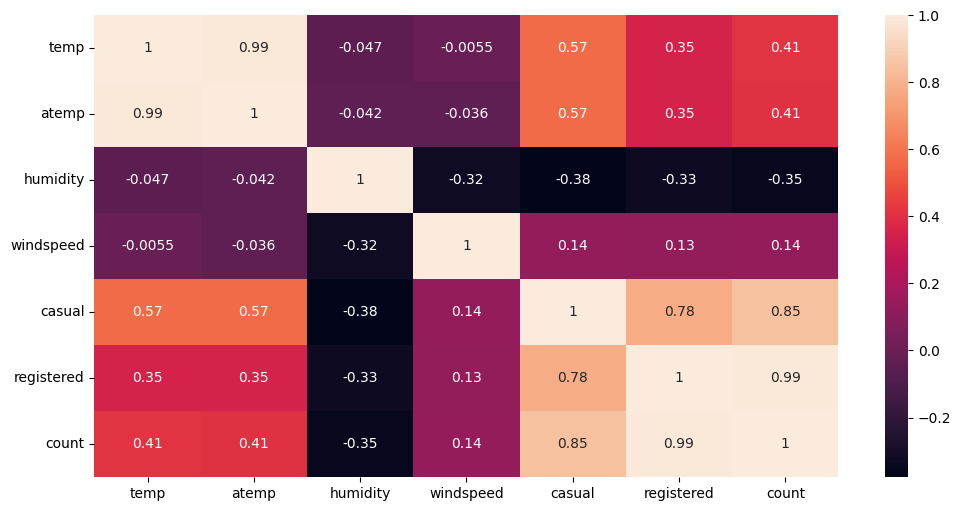

In [41]:
#correlation heatmap for num_cols with count

# plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(method='spearman'),annot=True)
plt.show()


#### Observations
* very high correlation between temp and atemp which is obvious
* count is highly dependent on casual and registered user
* count has negligible impact of humidity
* registered and casual user also has very high correlation

#### Chi-square test for season and weather

In [44]:
#crosstab table for season vs weather

data_table = pd.crosstab(df['weather'],df['season'])
data_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [51]:
# prompt: chi-square test for season vs weather

from scipy.stats import chi2_contingency as stats
chi2, p, dof, expected = chi2_contingency(data_table)
print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:")
print(expected)


Chi-square test statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
Degrees of freedom: 9
Expected frequencies:
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [52]:
alpha = 0.05

if p <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


In [53]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

print(np.var(data_group1), np.var(data_group2))
np.var(data_group2)// np.var(data_group1)

30171.346098942427 34040.69710674686


1.0

In [56]:
# T test
from scipy.stats import ttest_ind

ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

In [57]:
# ANNOVA test for rental cycles for different season and weather

from statsmodels.graphics.gofplots import qqplot
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values
groups=[gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8]


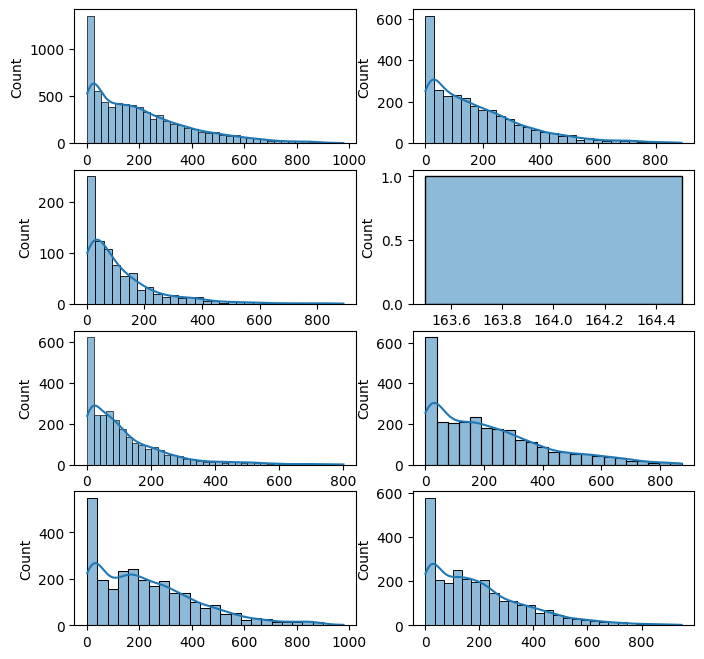

In [59]:
# histplots for above groups

fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index], ax=axis[row, col], kde=True)
        index += 1

plt.show()

#### Q-Q plot

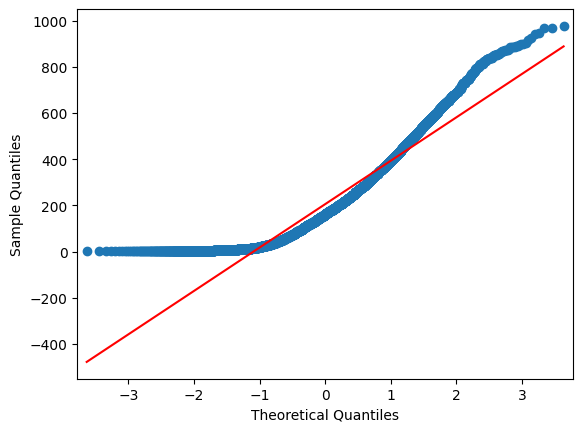

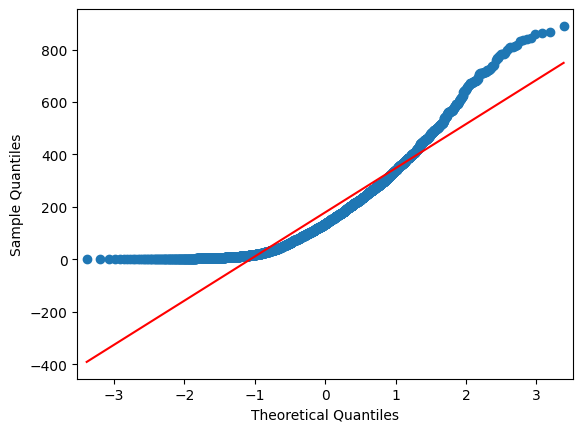

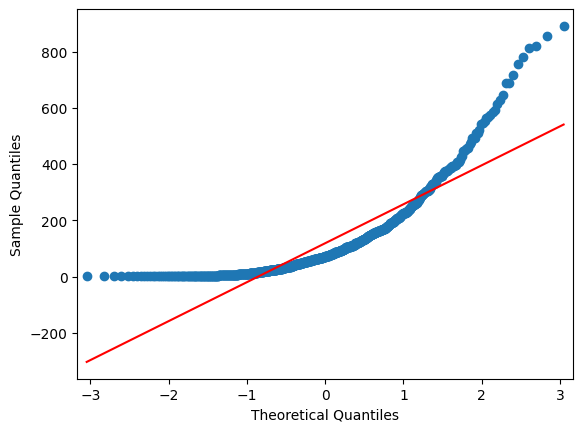

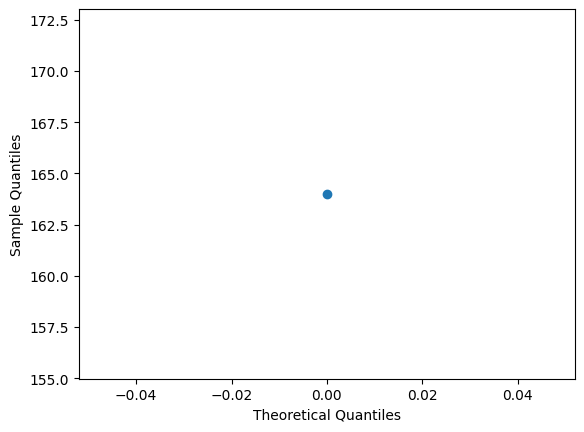

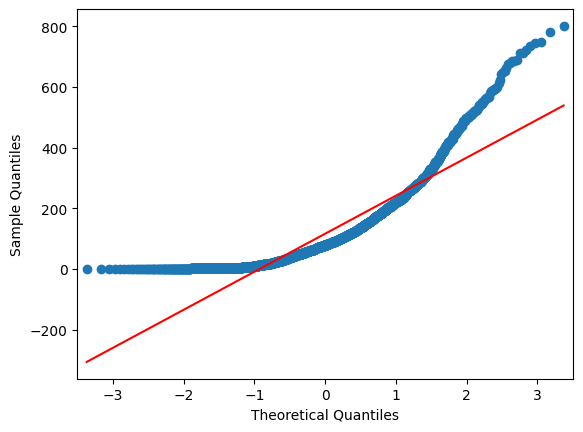

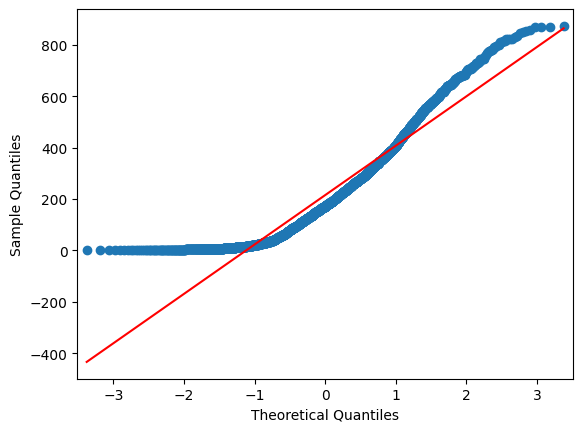

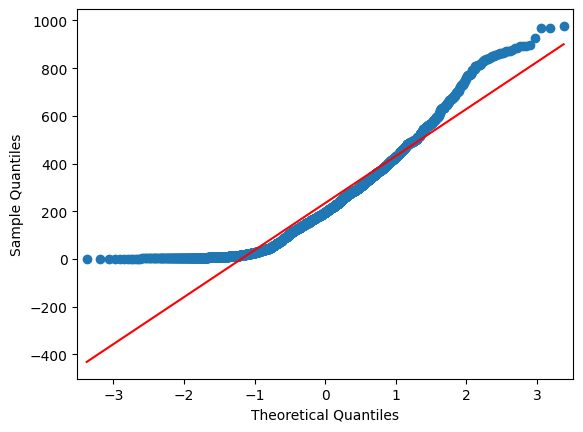

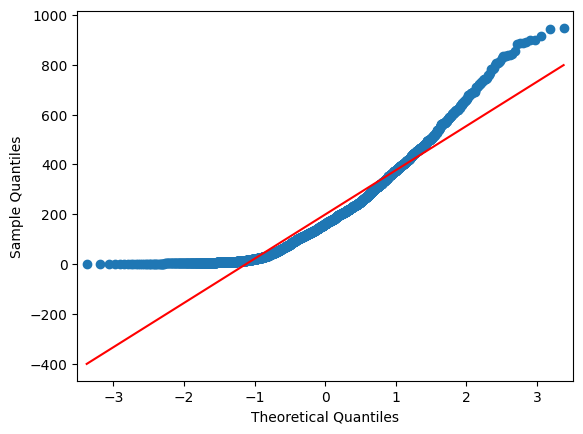

In [62]:
# qqplot for groups

index = 0
for row in range(4):
    for col in range(2):
        qqplot(groups[index], line="s")
        index += 1

plt.show()

#### Levene's test


In [64]:
#Null Hypothesis: Variances is similar in different weather and season.

#Alternate Hypothesis: Variances is not similar in different weather and season.

#Significance level (alpha): 0.05
from scipy.stats import levene

levene_stat, p_value = levene(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print(p_value)
if p_value < 0.05:
    print("Reject the Null hypothesis.Variances are not equal")
else:
  print("Fail to Reject the Null hypothesis.Variances are  equal")

3.463531888897594e-148
Reject the Null hypothesis.Variances are not equal


In [65]:
#assumptions of ANOVA don't hold, we need Kruskal Wallis
from scipy.stats import kruskal

kruskal_stat, p_value = kruskal(gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8)
print("p_value===",p_value)
if p_value<0.05:
  print("Since p-value is less than 0.05, we reject the null hypothesis")

p_value=== 4.614440933900297e-191
Since p-value is less than 0.05, we reject the null hypothesis
